BAR CHARTS AND PIE CHARTS
# Review
Give yourself a pat on the back! You have done some deep dives into two of the most common visuals for categorical data. Let’s review some of the key concepts from this lesson.

## Bar Charts
- Bar charts are useful for visualizing counts of categorical data.
- In a bar chart, the height and area are proportional to the value represented. This makes it easy to compare different variables in the bar graph.
- Seaborn is a library that makes it easy to create bar charts with the `.countplot()` method.
- Bar charts have the broadest appeal and are the most common go-to when plotting categorical data.

## Pie Charts
- A pie chart is another way to represent categorical data. Instead of displaying counts of categorical data through bars, a pie chart shows a part-to-whole relationship by - displaying each variable as a sector on a circle.
- In a pie chart, the arc length and area of each sector are proportional to the value they represent.
- You can plot pie charts in Python using the `.pie()` method in Matplotlib. *Pie chart sectors often harder to compare than simple bars, and having too many sectors causes clutter in the visual quickly. This makes use cases for pie charts more limited.

**Instructions**

If you would like some opportunity to explore more plotting of categorical variables, we have imported a csv file from Kaggle about [animal bites](https://www.kaggle.com/rtatman/animal-bites). We have previewed the data for you on the left. See if there are any columns of data that you would like to explore through bar charts or pie charts.

Happy Coding!

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('Health_AnimalBites.csv')
df.head();

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9003 entries, 0 to 9002
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bite_date          8686 non-null   object 
 1   SpeciesIDDesc      8885 non-null   object 
 2   BreedIDDesc        3759 non-null   object 
 3   GenderIDDesc       6477 non-null   object 
 4   color              6426 non-null   object 
 5   vaccination_yrs    3738 non-null   float64
 6   vaccination_date   4115 non-null   object 
 7   victim_zip         7165 non-null   object 
 8   AdvIssuedYNDesc    2565 non-null   object 
 9   WhereBittenIDDesc  8387 non-null   object 
 10  quarantine_date    2020 non-null   object 
 11  DispositionIDDesc  1535 non-null   object 
 12  head_sent_date     395 non-null    object 
 13  release_date       1445 non-null   object 
 14  ResultsIDDesc      1543 non-null   object 
dtypes: float64(1), object(14)
memory usage: 1.0+ MB
None


In [6]:
df.SpeciesIDDesc.value_counts()

SpeciesIDDesc
DOG        7029
CAT        1568
BAT         237
RACCOON      27
OTHER        11
HORSE         5
FERRET        4
RABBIT        3
SKUNK         1
Name: count, dtype: int64

In [7]:
df.SpeciesIDDesc.value_counts().index

Index(['DOG', 'CAT', 'BAT', 'RACCOON', 'OTHER', 'HORSE', 'FERRET', 'RABBIT',
       'SKUNK'],
      dtype='object', name='SpeciesIDDesc')

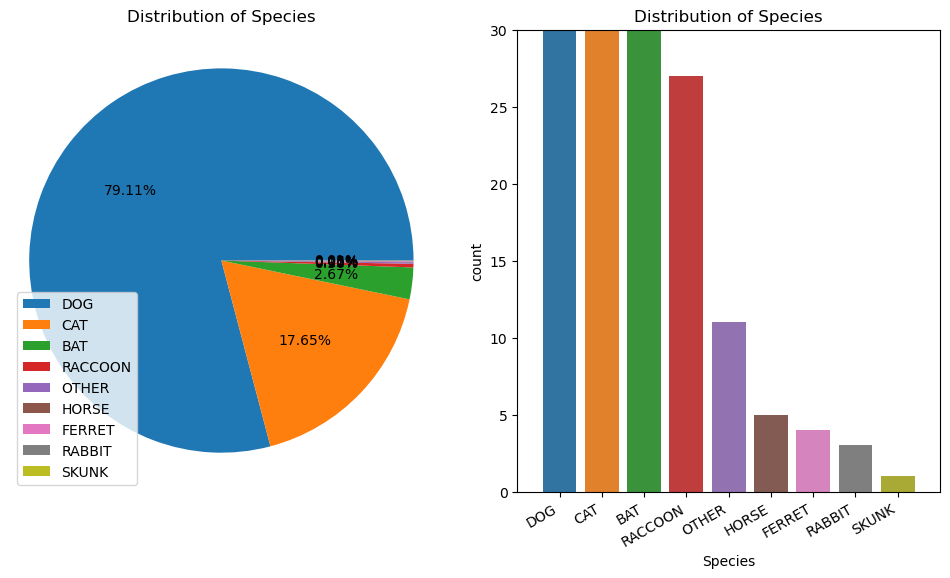

<Figure size 640x480 with 0 Axes>

In [8]:
plt.figure(figsize=(12,6))

# Distribution of Species
species_counts = df.SpeciesIDDesc.value_counts()
species_labels = df.SpeciesIDDesc.value_counts().index

plt.subplot(1,2,1)
plt.pie(x=species_counts, autopct='%0.2f%%')
plt.axis('equal')
plt.title('Distribution of Species')
plt.legend(species_labels, loc=3)
# plt.subplots_adjust(bottom=0)

plt.subplot(1,2,2)
sns.barplot(x=species_labels, y=species_counts)
plt.axis([-1,9,0,30])
plt.xticks(rotation=30, ha='right')
plt.title('Distribution of Species')
plt.xlabel('Species')


plt.show()
plt.clf()


In [9]:
# Where Bitten by Species

bite_df = pd.DataFrame()

bite_df['bitten_body'] = df.SpeciesIDDesc[df.WhereBittenIDDesc == 'BODY'].value_counts()
bite_df['bitten_head'] = df.SpeciesIDDesc[df.WhereBittenIDDesc == 'HEAD'].value_counts()
bite_df['bitten_unknown'] = df.SpeciesIDDesc[df.WhereBittenIDDesc == 'UNKNOWN'].value_counts()

bite_df = bite_df.fillna(0)
bite_df

,bitten_body,bitten_head,bitten_unknown
SpeciesIDDesc,,,
DOG,4909,1184.0,637.0
CAT,1184,49.0,245.0
BAT,41,2.0,20.0
RACCOON,17,0.0,2.0
OTHER,7,1.0,0.0
RABBIT,2,0.0,0.0
HORSE,2,1.0,2.0
FERRET,2,0.0,2.0
SKUNK,1,0.0,0.0


In [10]:
bite_df.iloc[0]    # subset row
bite_df.iloc[:,0]    # subset column

SpeciesIDDesc
DOG        4909
CAT        1184
BAT          41
RACCOON      17
OTHER         7
RABBIT        2
HORSE         2
FERRET        2
SKUNK         1
Name: bitten_body, dtype: int64

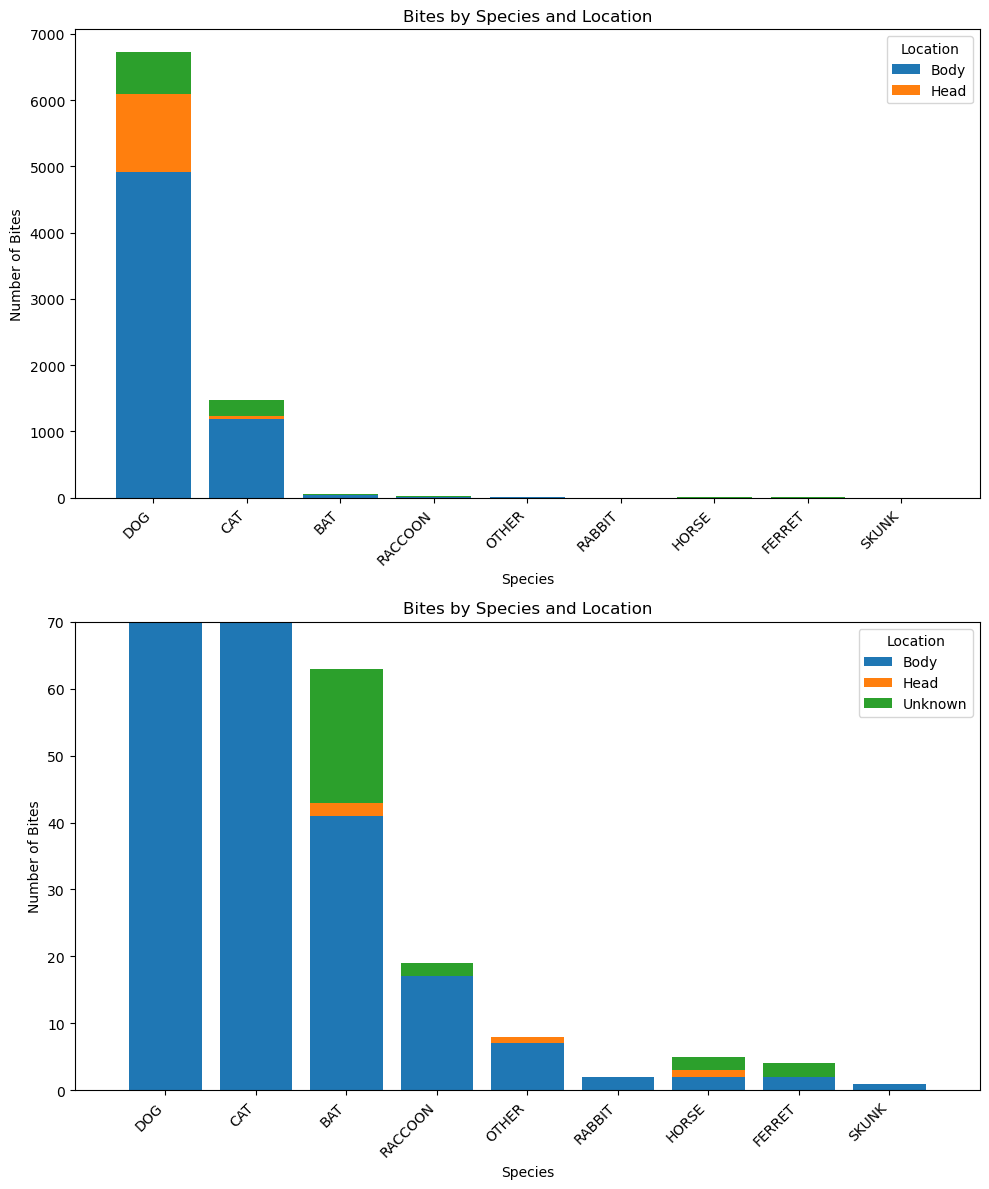

In [13]:
# Plotting
plt.figure(figsize=(10,12))

# Subplot 1
plt.subplot(2,1,1)
plt.bar(bite_df.index, bite_df.iloc[:,0], label='Body')
plt.bar(bite_df.index, bite_df.iloc[:,1], bottom=bite_df.iloc[:,0],label='Head')
# plt.bar(bite_df.index, bite_df.iloc[:,2], bottom=(bite_df.iloc[:,0] + bite_df.iloc[:,1]), label='Unknown')
plt.bar(bite_df.index, bite_df.iloc[:,2], bottom=np.add(bite_df.iloc[:,0], bite_df.iloc[:,1]))

# ax = bite_df.plot(kind='bar', stacked=True, figsize=(10, 6))    # alternative plot method

plt.title('Bites by Species and Location')
plt.xlabel('Species')
plt.ylabel('Number of Bites')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Location', loc=1)
plt.tight_layout()
# plt.axis([-1,len(bite_df.index), 0, 70])    # zooming plot

# Subplot 2
plt.subplot(2,1,2)
plt.bar(bite_df.index, bite_df.iloc[:,0], label='Body')
plt.bar(bite_df.index, bite_df.iloc[:,1], bottom=bite_df.iloc[:,0],label='Head')
plt.bar(bite_df.index, bite_df.iloc[:,2], bottom=(bite_df.iloc[:,0] + bite_df.iloc[:,1]), label='Unknown')

plt.title('Bites by Species and Location')
plt.xlabel('Species')
plt.ylabel('Number of Bites')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Location', loc=1)
plt.tight_layout()
plt.axis([-1,len(bite_df.index), 0, 70])    # zooming plot


plt.show()
plt.close()

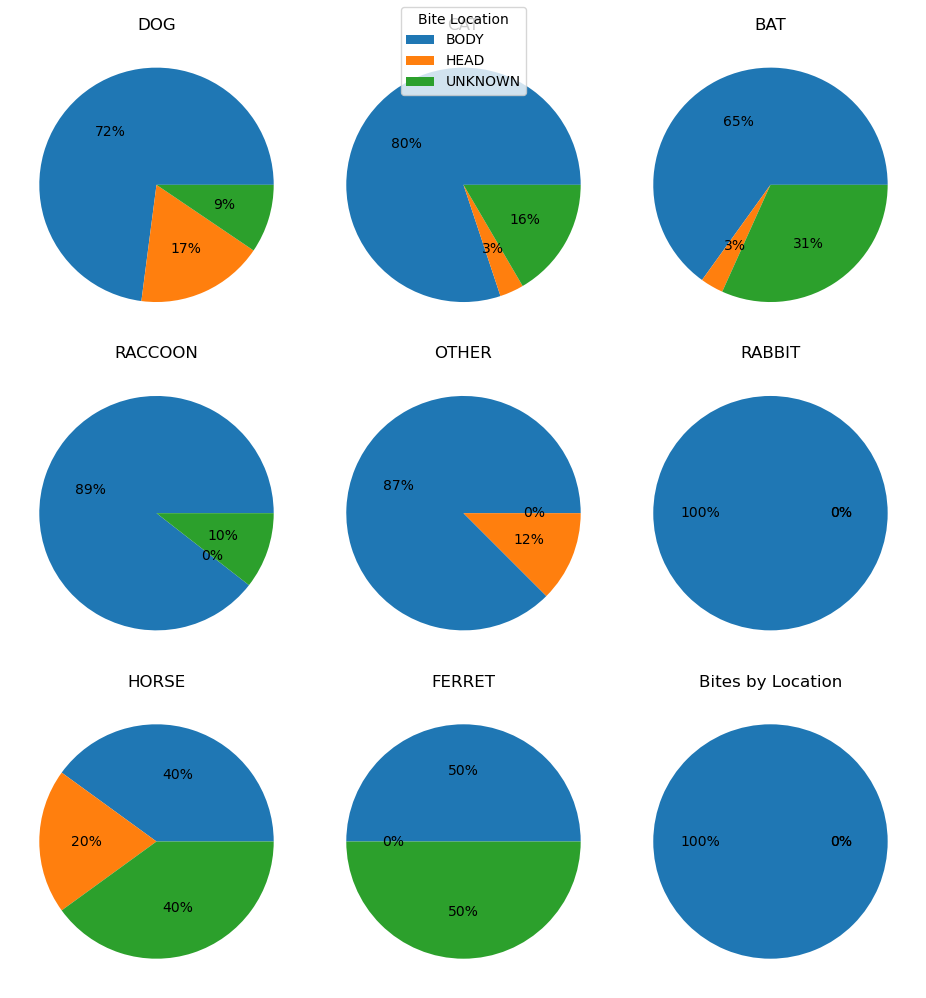

In [12]:
# plot bite type by species
ax = plt.figure(figsize=(10,10))

for i in range(len(bite_df)):    
    plt.subplot(3,3,i+1)
    plt.pie(bite_df.iloc[i], autopct='%d%%')
    plt.title(bite_df.index[i])

ax.legend(['BODY', 'HEAD', 'UNKNOWN'], title='Bite Location', loc=9)
plt.subplots_adjust(top=.7, hspace=.3)
plt.title('Bites by Location')    # BUG
plt.tight_layout()

plt.show()